In [1]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 

from mod.SimSale import SimSale
from mod.Demand import Demand
from numba import jit

# from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [15]:
sim_sale=SimSale(level_size=[3,3],seed=100)
sale_df = sim_sale.generate_sale(lam=1000,size=200,un_ava_frac=0.25,un_ava_mix=True)
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df, 
             goods_attr={'A': list('abc'), 'B': list('abc')})
sale_df

a    0.485342
b    0.346753
c    0.167905
Name: A, dtype: float64
a    0.347622
b    0.320975
c    0.331403
Name: B, dtype: float64
          a         b         c
a  1.000000  0.876289  0.536825
b  0.711237  1.000000  0.619339
c  0.170992  0.883331  1.000000
         a         b         c
a  1.00000  0.896199  0.451751
b  0.69392  1.000000  0.897907
c  0.88076  0.354211  1.000000


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,NaN,321.0,146.0,126.0,107.0,123.0,NaN,135.0,56.0
1,150.0,167.0,179.0,125.0,NaN,197.0,NaN,115.0,50.0
2,NaN,315.0,156.0,122.0,104.0,107.0,NaN,112.0,55.0
3,165.0,166.0,190.0,179.0,98.0,114.0,NaN,NaN,97.0
4,NaN,NaN,308.0,259.0,123.0,131.0,43.0,69.0,51.0
...,...,...,...,...,...,...,...,...,...
195,NaN,304.0,160.0,95.0,111.0,98.0,NaN,116.0,53.0
196,NaN,312.0,146.0,NaN,202.0,109.0,63.0,49.0,71.0
197,172.0,NaN,294.0,234.0,108.0,NaN,61.0,55.0,64.0
198,163.0,238.0,170.0,214.0,NaN,NaN,58.0,66.0,56.0


## 2.参数估计

     fun: 354635.9303217127
 message: ['Maximum number of iteration reached']
    nfev: 124119
    nhev: 0
     nit: 2000
    njev: 2743
  status: 0
 success: True
       x: array([ 0.56500685,  0.22786774, -0.500161  ,  0.13067454,  0.05070011,
        0.09559233,  1.53678207, -0.54138643, -0.1908612 ,  0.95406257,
       -0.26601014,  1.53691039,  2.18291071,  0.4637661 ,  1.87493079,
        0.13192593,  1.53691038,  0.13549522])
([array([0.48579545, 0.34676543, 0.16743912]), array([0.34618056, 0.3195731 , 0.33424634])], [array([0.82299645, 0.36786512, 0.45242902, 0.72193146, 0.43388686,
       0.82301514]), array([0.89870436, 0.61390722, 0.86702778, 0.53293373, 0.82301514,
       0.53382208])])


0.7273260287421721

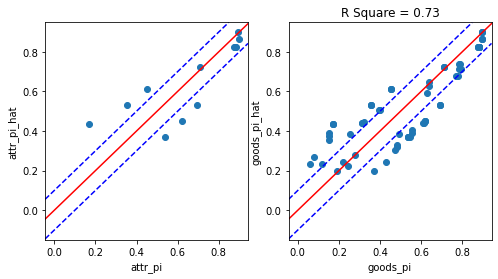

In [18]:
# method='dual_annealing'
mod.fit(method='dual_annealing',maxiter=2000)
print(mod.theta_hat)
print(mod.init_theta(mod.theta_hat.x,to_goods=False))

mod.score(SimSale=sim_sale,plot=True)

In [7]:
mod.attr_trans

[       A_a  A_b
 A_a    NaN  NaN
 A_b  200.0  NaN,
        B_a  B_b
 B_a    NaN  NaN
 B_b  200.0  NaN]

(array([0.58272747, 0.41727253, 0.45663565, 0.54336435, 0.07955721,
        0.93312273, 0.09761845, 0.95108876]),
 array([0.58387084, 0.41612916, 0.45772765, 0.54227235, 0.04742587,
        0.81022979, 0.04742951, 0.83153173]),
 [array([ 3.44225106e-01,  9.68348101e-04, -3.11423871e-02,  1.09379695e-01,
         -2.48791552e+00,  2.03750874e+00, -2.23334381e+00,  2.11909533e+00]),
  array([ 0.1536211 , -0.18649145, -0.07773093,  0.06640072, -2.51880184,
          1.98519315, -2.25191323,  1.98520138]),
  array([ 0.39501418,  0.04955504, -0.01808469,  0.13399318, -2.72066399,
          2.0817376 , -2.33712889,  2.09476261]),
  array([-0.55701629, -0.90069834, -0.681956  , -0.52144029, -2.99922924,
          2.1987586 , -2.9986201 ,  2.30156267]),
  array([ 0.5411034 ,  0.1989043 ,  0.09403164,  0.26328938, -2.95863196,
          2.25147701, -2.5293123 ,  2.74192066]),
  array([ 0.08182836, -0.26158161, -0.04623875,  0.12732119, -2.99981974,
          2.23144047, -2.99964684,  2.9997987 

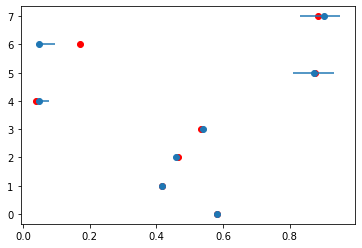

In [12]:
mod.conf_int(SimSale=sim_sale,bootstrap_n=30)

In [ ]:
mod.init_theta(np.zeros(18))

In [17]:
mod.theta_hat_goods_pi

array([[1.        , 0.90055733, 0.7105921 , 0.84885489, 0.76444249,
        0.60318958, 0.16900629, 0.15219985, 0.12009454],
       [0.61652738, 1.        , 0.86682393, 0.52334228, 0.84885489,
        0.73580773, 0.10419701, 0.16900629, 0.1464987 ],
       [0.8488674 , 0.14998063, 1.        , 0.72056524, 0.12731179,
        0.84885489, 0.14346393, 0.02534767, 0.16900629],
       [0.72528868, 0.65316404, 0.51538441, 1.        , 0.90055733,
        0.7105921 , 0.71654589, 0.64529066, 0.50917185],
       [0.44716033, 0.72528868, 0.62869758, 0.61652738, 1.        ,
        0.86682393, 0.44177016, 0.71654589, 0.62111913],
       [0.61567392, 0.10877925, 0.72528868, 0.8488674 , 0.14998063,
        1.        , 0.60825245, 0.107468  , 0.71654589],
       [0.58467934, 0.52653727, 0.41546852, 0.8488674 , 0.76445376,
        0.60319847, 1.        , 0.90055733, 0.7105921 ],
       [0.36047083, 0.58467934, 0.50681404, 0.52335   , 0.8488674 ,
        0.73581858, 0.61652738, 1.        , 0.86682393],


In [ ]:
c